In [38]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

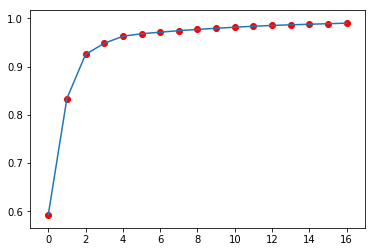

In [42]:
test = pd.read_csv('secom.data', delimiter=' ', header=None)
test = test.fillna(test.mean())
pca = PCA(n_components=0.99) 
pca.fit(test)
pca.explained_variance_ratio_
data = np.cumsum(pca.explained_variance_ratio_)
X = np.arange(0,len(data),1)
plt.plot(X, data)
plt.scatter(X, data, c='r')
plt.show()

In [43]:
import requests
from bs4 import BeautifulSoup

In [112]:
page_all = []
for i in range(0,770,20):
    content = requests.get('https://movie.douban.com/subject/27133303/reviews?start='+str(i)).text
    soup = BeautifulSoup(content, 'lxml')
    maintitle = soup.title.text.strip()
    page_list = soup.find('div', class_ = 'review-list').find_all('div', class_= 'main-bd')
    page_information = []
    for _, temp in enumerate(page_list):
        review_title = temp.find('a').text
        review_url = temp.find('a')['href']
        review_information = review_title+'\t'+review_url +'\t'
#         print(review_information)
        page_information.append(review_information)
        page_all = page_all + page_information

['“在我们相爱的时候，你可能还没有认识我。”\thttps://movie.douban.com/review/9370986/\t', '“在我们相爱的时候，你可能还没有认识我。”\thttps://movie.douban.com/review/9370986/\t', '土味情话影中存，来生还做社会人\thttps://movie.douban.com/review/9376567/\t', '“在我们相爱的时候，你可能还没有认识我。”\thttps://movie.douban.com/review/9370986/\t', '土味情话影中存，来生还做社会人\thttps://movie.douban.com/review/9376567/\t', '《超时空同居》中哪些片段或细节打动了你？\thttps://movie.douban.com/review/9378051/\t', '“在我们相爱的时候，你可能还没有认识我。”\thttps://movie.douban.com/review/9370986/\t', '土味情话影中存，来生还做社会人\thttps://movie.douban.com/review/9376567/\t', '《超时空同居》中哪些片段或细节打动了你？\thttps://movie.douban.com/review/9378051/\t', '你确定未来的我是你想要的吗？\thttps://movie.douban.com/review/9371524/\t', '“在我们相爱的时候，你可能还没有认识我。”\thttps://movie.douban.com/review/9370986/\t', '土味情话影中存，来生还做社会人\thttps://movie.douban.com/review/9376567/\t', '《超时空同居》中哪些片段或细节打动了你？\thttps://movie.douban.com/review/9378051/\t', '你确定未来的我是你想要的吗？\thttps://movie.douban.com/review/9371524/\t', '终于，爱情成为了爱情片的万能解药\thttps://movie.douban.com/review/9374768/\t', '“在我们相爱的时候

In [111]:
page_information

['又哭又笑，优秀的喜剧\thttps://movie.douban.com/review/9348416/\t',
 '时空的搞笑恋情，还欠火候\thttps://movie.douban.com/review/9348412/\t',
 '不落俗套的爱情故事\thttps://movie.douban.com/review/9348407/\t',
 '太爱这部电影了！！\thttps://movie.douban.com/review/9348396/\t',
 '喜剧＋感人＋正能量\thttps://movie.douban.com/review/9348395/\t',
 '我想遇到你，19年后的你\thttps://movie.douban.com/review/9348392/\t',
 '你最美\thttps://movie.douban.com/review/9348386/\t',
 '电影超时空同居\thttps://movie.douban.com/review/9348385/\t',
 '超时空同居我真的是很喜欢了！\thttps://movie.douban.com/review/9348353/\t',
 '《超时空同居》观感\thttps://movie.douban.com/review/9346059/\t',
 '好好的，靠自己。\thttps://movie.douban.com/review/9345998/\t',
 '无（ya）比（ya）期（shi）待（zhen）的（de）电（hao）影（kan）\thttps://movie.douban.com/review/9345980/\t',
 '全场笑声不断，预定今年票房黑马\thttps://movie.douban.com/review/9344221/\t',
 '#超时空同居\thttps://movie.douban.com/review/9342341/\t',
 '超时空同居\thttps://movie.douban.com/review/9342308/\t',
 '值得一看\thttps://movie.douban.com/review/9327678/\t',
 '超出预期，推荐。\thttps://movie.douban.com/review/

In [113]:
with open('douban.txt', 'w', encoding='utf-8') as f:
    for _, temp in enumerate(page_all):
        print(temp, file = f)